In [2]:
# Throughput 
# Graph plot change 
# Halls theorem : it states that if there is a set S having n elements and a set T having m elements with the preference for each i in S as {T2,T3,T4},{T1,T3,T4}....{T1,Tm}
# then if for each subset in S, P if cardinality(P) <= cardinality(Neighbour(P)) then a matching is possible for this bipartite graph (no two edges must have a common vertex)
# A -> (1, 2) , B -> (2), C -> (3)
# task -> frequency of arrival, size, CPU cycles required, deadline
# ith[1,0,0,0,0]
# [0,1,0,0,0]
# 0.5
# 0th [ 0 0 0 0 0 0.4 0 0 0 0 ]
# 1th [ 0 0.2 0 0 0 0 0 0 0 0 ]

# matrix of offloading where Aij represents the fraction of bits offloaded to edge server j of task i
# A mobile device Ui can only offload to a single edge server Ej
# the local computation time = ((1 - sum(Aij)) * Qi * Ci) / fi (Qi -> total bits, Ci -> CPU cycles for single bit, fi -> CPU cycles/sec for the mobile device)
# local energy consumption = (1 - sum(Aij)) * Qi * Ci * k * (fi)^2 (k -> mobile constant)
# Uplink Rate = Wlog(1 + (Pi * Gij) / N) (W -> uplink channel bandwidth, Pi -> transmission power of device i, Gij -> channel gain, N -> Gaussian Noise)
# Upload Time = sum((Aij * Qi) / Rij)
# Time at MEC = sum((Aij * Qi * Ci) / fj)
# Energy consumed in Transmission = sum(((Aij * Qi) / Rij) * Pi)

# Overall Delay = T(local) + T(transmission) + T(MEC)
# Overall Energy = E(local) + E(transmission)
# utility
# Priority of task = Total CPU Cycles / Execution Deadline
# Priority of Edge Server = Fj / (dist(u,Mj)) ^ x

# Threshold for edge server selection priority >= 0.6
# (A,B,C), (A,D), (A,E) -> 0.6
# (A,D,E), (A,E), (A,W) -> 0.7

# Threshold vs Energy, Threshold vs Time, Threshold vs Matching Found

# Assumption
# Each mobile device has a single task to perform

# threshold, offloading factor

In [27]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [29]:
threshold = np.arange(0.0, 2.1, 0.1)
offloading_factor_array = [0.0,0.2,0.4,0.6,0.8,1]
total_scenario = len(offloading_factor_array) * len(threshold)
sum = 0
print(threshold)
energy_array = []
time_array = []
for offloading_factor_value in offloading_factor_array:
  energy = []
  time = []
  for server_selection_threshold in threshold:
    # edge server selection
    computing_power = [10, 14, 23, 45, 55, 21] # CPU cycles/sec
    edge_server_x_coordinate = [92, 23, 22, 45, 52, 62]
    edge_server_y_coordinate = [10, 9, 22, 30, 10, 20]
    mobile_device_x_coordinate = [2, 3, 3, 11]
    mobile_device_y_coordinate = [20, 29, 29, 28]
    # server_selection_threshold = 0.6
    number_of_mobile_devices = 4
    number_of_edge_servers = 6
    possible_configuration = []
    for i in range(0, number_of_mobile_devices):
      possible_edge_servers = []
      for j in range(0, number_of_edge_servers):
        planar_distance = math.sqrt((edge_server_x_coordinate[j]-mobile_device_x_coordinate[i])**2 + (edge_server_y_coordinate[j]-mobile_device_y_coordinate[i])**2)
        priority = computing_power[j] / planar_distance
        if priority >= server_selection_threshold:
          possible_edge_servers.append([j,priority])
      sorted(possible_edge_servers, key=lambda edge_server: edge_server[1], reverse = True)
      sorted_by_priority_edge_server = []
      for list in possible_edge_servers:
        sorted_by_priority_edge_server.append(list[0])
      possible_configuration.append(sorted_by_priority_edge_server)

    print(possible_configuration)
    # S = [[1,2], [3,4]]
    # Card(S) = 2
    # Card(N(S)) = p = {1,2,3,4} => 4
    # Card(N(S)) >= Card(S)
    def cardinality_of_neighbours(nums):
      distinct_elements = set()
      for list in nums:
        for element in list:
          distinct_elements.add(element)
      return len(distinct_elements)
    def halls_theorem(configuration, subset, index):
      if index == len(configuration):
        if len(subset) <= cardinality_of_neighbours(subset):
          return True
        else:
          return False

      ans = True
      # including
      subset.append(configuration[index])
      ans = ans and halls_theorem(configuration, subset, index + 1)
      subset.pop()
      # excluding
      ans = ans and halls_theorem(configuration, subset, index + 1)
      return ans
    if halls_theorem(possible_configuration, [], 0):
      print("This configuration follows halls theorem")
    else:
      print("This configuration doesnot follows halls theorem")
    # this is created by us
    def selection_algorithm(possible_configuration, priority_task, visited, index, matching): # O(n * 2 ^ (m))
      if index == len(priority_task):
        return True
      found = False
      for edge_server in possible_configuration[priority_task[index][1]]:
        if edge_server not in visited:
          visited.add(edge_server)
          matching.append([priority_task[index][1],edge_server])
          found = found or selection_algorithm(possible_configuration, priority_task, visited, index + 1, matching)
          if found:
            return True;
          matching.pop()
          visited.remove(edge_server)
      return found
    mobile_device_computing_power = [10, 20, 10, 30] #CPU cylces/sec
    mobile_device_transmission_power = [2, 3, 1, 2]
    task_bits = [200, 102, 202, 101] #bits
    CPU_cycle_task_bit = [1, 2, 2, 1] #CPU cycle for a single bit
    execution_deadline = [10, 20, 10, 30] #sec
    priority_task = []
    for i in range(0,number_of_mobile_devices):
      priority_task.append([(task_bits[i] * CPU_cycle_task_bit[i]) / execution_deadline[i],i])
    sorted(priority_task, key=lambda priority: priority[0], reverse = True)
    matching = []
    visited = set()
    if len(possible_configuration) > 0:
      selection_algorithm(possible_configuration, priority_task, visited, 0, matching)
    print(matching)
    sum += (len(matching) > 0)
    offloading_factor = offloading_factor_value
    matching_matrix = [];
    for i in range(0, number_of_mobile_devices):
      row = [];
      for j in range(0, number_of_edge_servers):
        row.append(0)
      matching_matrix.append(row)
    for list in matching:
      matching_matrix[list[0]][list[1]] = offloading_factor
    print(matching_matrix)
    local_computation_time = 0
    local_energy_consumption = 0
    mobile_constant = 1
    channel_gain = 1.2 #different for i,j
    gaussian_noise = 0.8
    channel_bandwidth = 1.8
    upload_time = 0
    edge_device_computing_time = 0
    transmission_energy = 0
    uplink_rate = []

    for i in range(0, number_of_mobile_devices):
      offloaded_bits = 0
      selected_edge_device = 0
      uplink_rate.append(channel_bandwidth * math.log(1 + (mobile_device_computing_power[i]*channel_gain) / gaussian_noise))
      for j in range(0, number_of_edge_servers):
        offloaded_bits += matching_matrix[i][j]
        if matching_matrix[i][j]:
          selected_edge_device = j
      local_computation_time += ((1 - offloaded_bits) * task_bits[i] * CPU_cycle_task_bit[i]) / mobile_device_computing_power[i]
      local_energy_consumption += (1 - offloaded_bits) * task_bits[i] * CPU_cycle_task_bit[i] * (mobile_device_computing_power[i])**2
      upload_time += (offloaded_bits * task_bits[i]) / uplink_rate[i]
      edge_device_computing_time += (offloaded_bits * task_bits[i] * CPU_cycle_task_bit[i]) / computing_power[selected_edge_device]
      transmission_energy += ((offloaded_bits * task_bits[i]) / uplink_rate[i]) * mobile_device_transmission_power[i]

    # print("overall delay is :", (local_computation_time + edge_device_computing_time + upload_time))
    # print("overall energy consumption is :", local_energy_consumption + transmission_energy)
    time.append(local_computation_time + edge_device_computing_time + upload_time)
    energy.append(local_energy_consumption + transmission_energy)
  
  energy_array.append(energy)
  time_array.append(time)


[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2. ]
[[0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5]]
This configuration follows halls theorem
[[0, 0], [1, 1], [2, 2], [3, 3]]
[[0.0, 0, 0, 0, 0, 0], [0, 0.0, 0, 0, 0, 0], [0, 0, 0.0, 0, 0, 0], [0, 0, 0, 0.0, 0, 0]]
[[0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5], [0, 1, 2, 3, 4, 5]]
This configuration follows halls theorem
[[0, 0], [1, 1], [2, 2], [3, 3]]
[[0.0, 0, 0, 0, 0, 0], [0, 0.0, 0, 0, 0, 0], [0, 0, 0.0, 0, 0, 0], [0, 0, 0, 0.0, 0, 0]]
[[1, 2, 3, 4, 5], [1, 2, 3, 4, 5], [1, 2, 3, 4, 5], [1, 2, 3, 4, 5]]
This configuration follows halls theorem
[[0, 1], [1, 2], [2, 3], [3, 4]]
[[0, 0.0, 0, 0, 0, 0], [0, 0, 0.0, 0, 0, 0], [0, 0, 0, 0.0, 0, 0], [0, 0, 0, 0, 0.0, 0]]
[[1, 2, 3, 4, 5], [1, 2, 3, 4, 5], [1, 2, 3, 4, 5], [1, 2, 3, 4, 5]]
This configuration follows halls theorem
[[0, 1], [1, 2], [2, 3], [3, 4]]
[[0, 0.0, 0, 0, 0, 0], [0, 0, 0.0, 0, 0, 0], [0, 0

In [30]:
print(time_array)
print(energy_array)

[[73.96666666666665, 73.96666666666665, 73.96666666666665, 73.96666666666665, 73.96666666666665, 73.96666666666665, 73.96666666666665, 73.96666666666665, 73.96666666666665, 73.96666666666665, 73.96666666666665, 73.96666666666665, 73.96666666666665, 73.96666666666665, 73.96666666666665, 73.96666666666665, 73.96666666666665, 73.96666666666665, 73.96666666666665, 73.96666666666665, 73.96666666666665], [92.39111224774256, 92.39111224774256, 88.30877834975648, 88.30877834975648, 88.30877834975648, 88.30877834975648, 87.07263931970441, 73.96666666666665, 73.96666666666665, 73.96666666666665, 73.96666666666665, 73.96666666666665, 73.96666666666665, 73.96666666666665, 73.96666666666665, 73.96666666666665, 73.96666666666665, 73.96666666666665, 73.96666666666665, 73.96666666666665, 73.96666666666665], [110.81555782881844, 110.81555782881844, 102.65089003284628, 102.65089003284628, 102.65089003284628, 102.65089003284628, 100.17861197274213, 73.96666666666665, 73.96666666666665, 73.96666666666665,

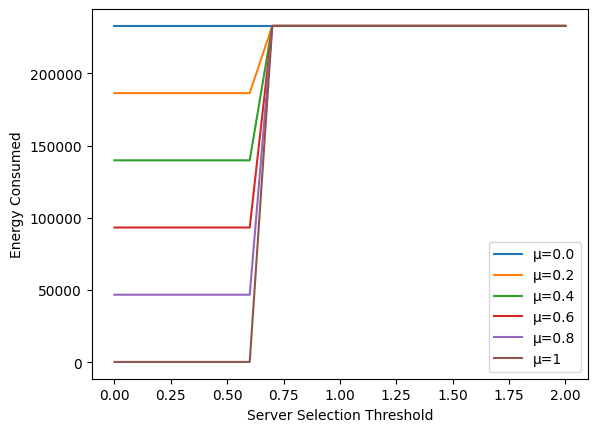

In [31]:
for i in range(0, len(energy_array)):
    plt.plot(threshold, energy_array[i], label="\u03BC={0}".format(offloading_factor_array[i]))
plt.xlabel('Server Selection Threshold')
plt.ylabel('Energy Consumed')
plt.legend(ncol = 1)
plt.show()

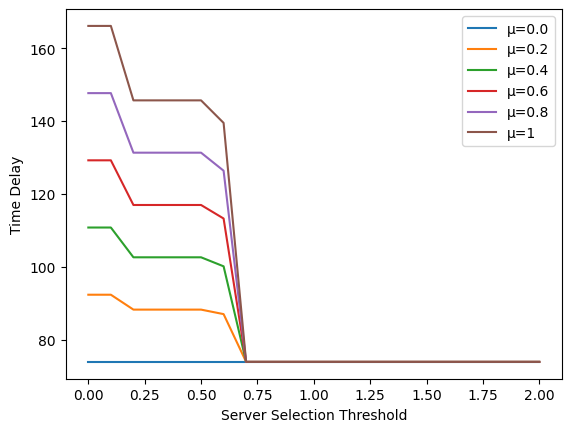

In [32]:
for i in range(0, len(time_array)):
    plt.plot(threshold, time_array[i], label="\u03BC={0}".format(offloading_factor_array[i]))
plt.xlabel('Server Selection Threshold')
plt.ylabel('Time Delay')
plt.legend(ncol = 1)
plt.show()

In [35]:
print('throughput is', sum / total_scenario)

throughput is 0.3333333333333333
